In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib
import seaborn as sns
%reload_ext autoreload
%autoreload 2

import datetime
from datetime import datetime
plt.style.use('fivethirtyeight')

import statsmodels.api as sm

PV Solar Power Plant:

1. Photo Voltaic Solar Power has emerged as the best source of green energy in recent past in a country like India which gets a good amount of solar insolation. With the continuous development of efficient PV modules, Battery storage and Smart Grid etc. Power Generation through PV Solar Plant has gained the momentum further and has a very promising future.
    


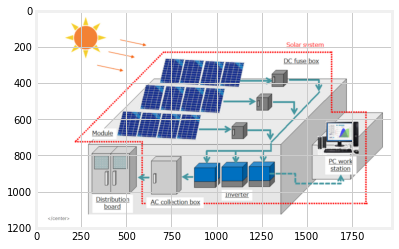

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

img = mpimg.imread('solar_Plant_overview.png')
imgplot = plt.imshow(img)

plt.show();

2. The solar power plant is also known as the Photovoltaic (PV) power plant. It is a large-scale PV plant designed to produce bulk electrical power from solar radiation. The solar power plant uses solar energy to produce electrical power. Therefore, it is a conventional power plant.Solar energy can be used directly to produce electrical energy using solar PV panels.Hence, to produce electrical power on a large scale, solar PV panels are used. Below is the layout plan of photovoltaic power plant.

3. The above picture shows a typical structure of a solar power plant. Sunlight falls on PV modules, generates DC Power which is fed to the Inverters (through some Junction Box and String Monitoring Box), Inverters convert DC Power to AC Power, AC Power is stepped up through Transformers to match Grid Voltage and finally fed to the Grid through some Switchgear.

## Challanges with PV Solar Power Generation:
1. Unlike conventional coal or gas based power plants, Solar Power Plants output are available during day time only and highly variable depending upon the availability of Sunlight.

2. Power generated has to be consumed instantly in the absence of a power storage (Battery storage is still emerging)

3. Spread over a large area, should be shadow free.

4. Regular cleaning of PV modules and physical fault detection in the field side.

## Data Description
We have at hand solar power generation data and weather data of a solar plower plants. Let's explore the given data, draw some insights, try to meet our challenges and predict/forecast the plant output to the extent possible which can be used for a better Grid Management/Stability.
1. Plant_2_Generation_Data.csv : In this data set - DATE_TIME, PLANT_ID, DC_Power, AC_POWER, DAILY_YIELD, TOTAL_YIELD are given

2. Plant_2_Weather_Sensor_Data.csv : In this data set - DATE_TIME, PLANT_ID, SOURCE_KEY, AMBIENT_TEMPERATURE, MODULE_TEMPERATURE, IRRADIATION are given

## Solar radiation terminology :

Peak sun hours (PSH): Daily irradiation is commonly referred to as daily PSH (or full sun hours). The number of PSH for the day is the number of hours for which power at the rate of 1kW/m2 would give an equivalent amount of energy to the total energy for that day. The terms peak sunlight hours and peak sunshine hours may also be used. Irradiation: The total quantity of radiant solar energy per unit area received over a given period, e.g. daily, monthly or annually. Insolation: Another term for irradiation. The amount of solar radiation, incident on the surface over a period of time, Peak sun hours (kWh/m2/ day) are a measurement of daily insolation. Irradiance: The solar radiation incident on a surface at any particular point in time measured in W/m2.

for this see below image

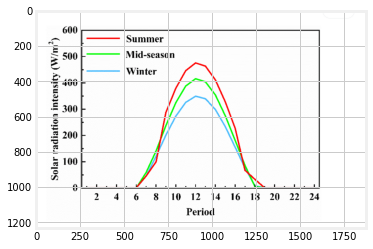

In [79]:
img = mpimg.imread('radiation.png')
imgplot = plt.imshow(img)

plt.show();

Example

If sunlight is received at an irradiance of 1000W/m2 for 2 hours, 600W/m2 for 1.5 hours and 200W/m2 for 1 hour, the total radiation received that day is 3.1PSH:

1000W/m2 × 2 hours + 600W/m2 × 1.5 hours + 200W/m2 × 1 hour = 3100W/m2/day

3100W/m2/day ÷ 1000W/m2/day = 3.1PSH

In [4]:
p2 = pd.read_csv('Plant_2_Generation_Data.csv',encoding="latin-1")

p2.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [5]:
w2 = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")
w2.head(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [6]:
p2['DATE_TIME'] = pd.to_datetime(p2['DATE_TIME'],format = '%Y-%m-%d %H:%M')
w2['DATE_TIME'] = pd.to_datetime(w2['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

##  Merging generation data and weather sensor data

In [7]:
solar = pd.merge(p2.drop(columns = ['PLANT_ID']), w2.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
46616,2020-06-08 00:15:00,oZZkBaNadn6DNKz,0.000000,0.000000,0.000000,1708233986.000000,24.852965,23.282043,0.000000
38769,2020-06-04 07:15:00,81aHJ1q11NBPMrL,209.726667,205.626667,117.066667,1215403862.066667,24.709500,28.199290,0.147949
52665,2020-06-10 21:00:00,oZ35aAeoifZaQzV,0.000000,0.000000,5585.000000,1660160703.000000,25.454093,24.635980,0.000007
60337,2020-06-14 12:15:00,PeE6FRyGXUgsRhN,1121.746667,1094.846667,3405.200000,1348532891.200000,32.039079,49.365407,0.878777
680,2020-05-15 07:30:00,xMbIugepa2P7lBB,453.600000,445.166667,283.533333,106656904.533333,26.424239,32.206804,0.382913


## Adding separate time and date columns

In [9]:
# adding separate time and date columns
solar["DATE"] = pd.to_datetime(solar["DATE_TIME"]).dt.date
solar["TIME"] = pd.to_datetime(solar["DATE_TIME"]).dt.time
solar['DAY'] = pd.to_datetime(solar['DATE_TIME']).dt.day
solar['MONTH'] = pd.to_datetime(solar['DATE_TIME']).dt.month
solar['WEEK'] = pd.to_datetime(solar['DATE_TIME']).dt.week


# add hours and minutes for ml models
solar['HOURS'] = pd.to_datetime(solar['TIME'],format='%H:%M:%S').dt.hour
solar['MINUTES'] = pd.to_datetime(solar['TIME'],format='%H:%M:%S').dt.minute
solar['TOTAL MINUTES PASS'] = solar['MINUTES'] + solar['HOURS']*60

# add date as string column
solar["DATE_STRING"] = solar["DATE"].astype(str) # add column with date as string
solar["HOURS"] = solar["HOURS"].astype(str)
solar["TIME"] = solar["TIME"].astype(str)

solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [10]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [11]:
solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [12]:
solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.563296,22.517061,714.329522
std,370.569597,362.112118,2919.448386,729667771.073241,4.021294,11.226446,0.309365,8.527546,0.499120,1.474730,16.764084,415.672274
min,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,21.000000,15.000000,360.000000
50%,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,23.000000,30.000000,720.000000
75%,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,24.000000,45.000000,1080.000000
max,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,25.000000,45.000000,1425.000000


## Converting 'SOURCE_KEY' from categorical form to numerical form

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(solar['SOURCE_KEY'])
solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,27.004764,25.060789,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


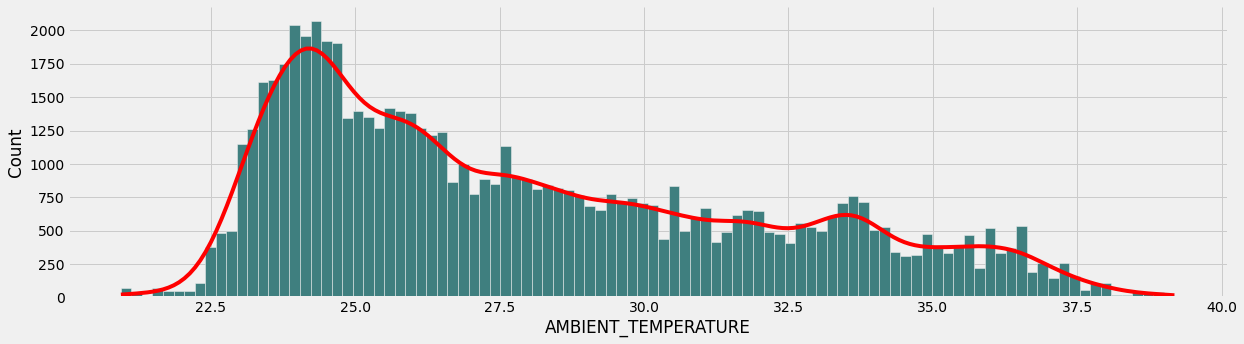

In [14]:
sns.displot(data=solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [15]:
solar['DATE'].nunique()

34

The data of solar power generation is of 34 days 

## Faults & Abnormalities detection in solar power plant generation

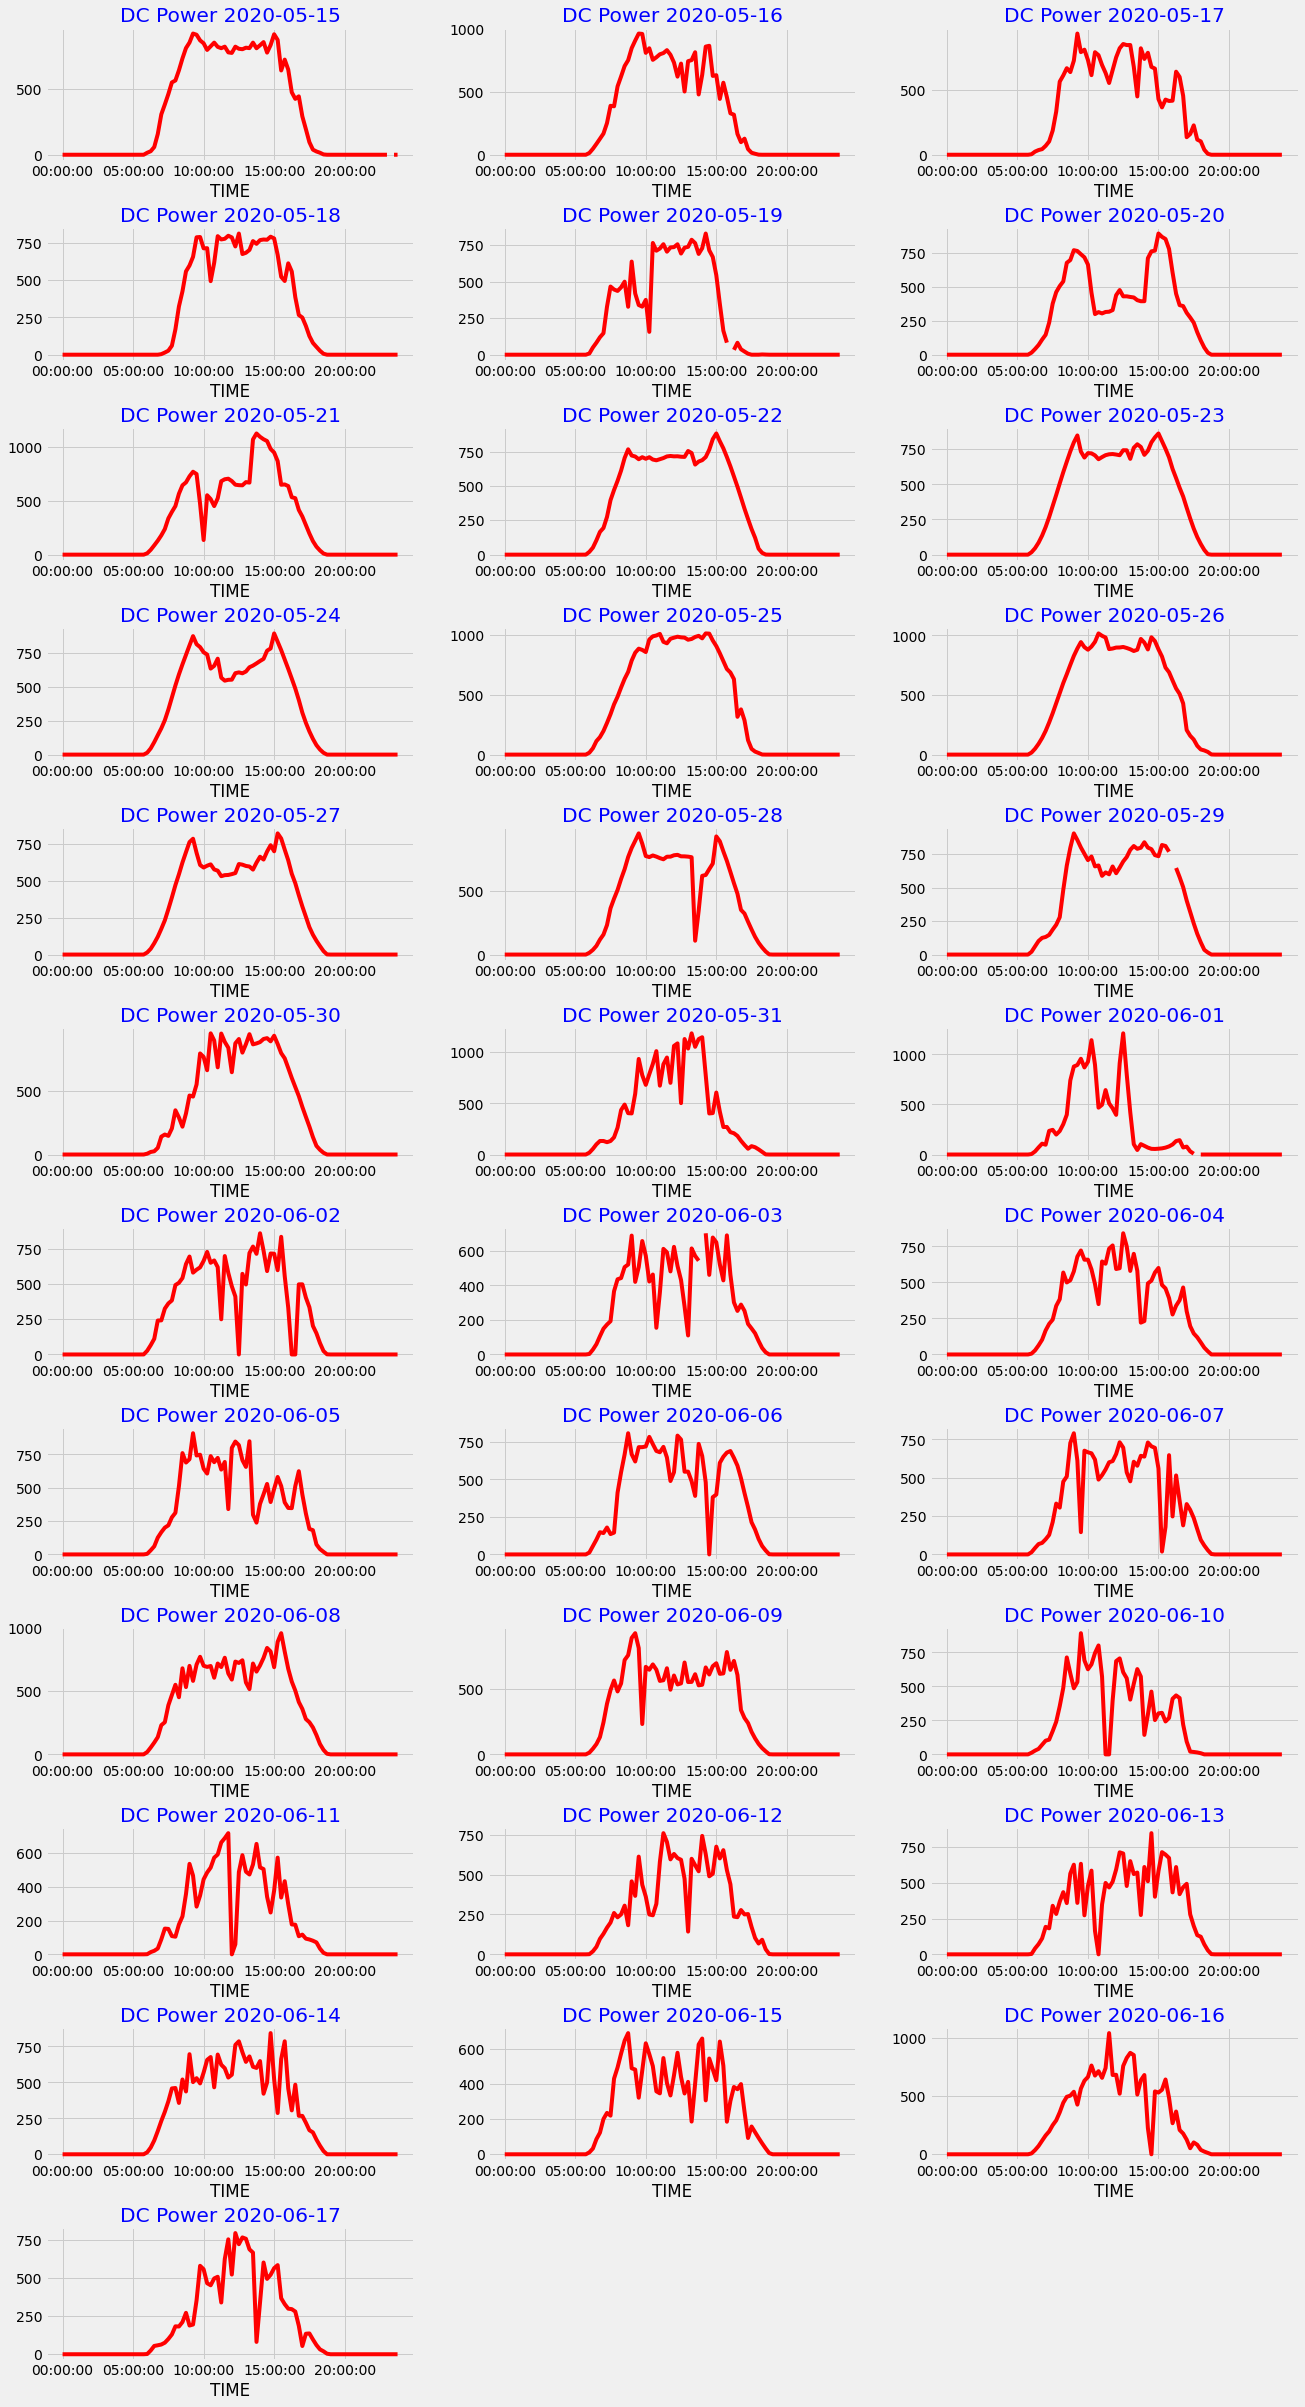

In [17]:
## Multiple Plotting of DC_POWER generation on per day basis.

solar_dc = solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=3)

# Less Fluctuation in DC_POWER generation is observed in these days.
* 2020-05-15
* 2020-05-18
* 2020-05-22
* 2020-05-23
* 2020-05-24
* 2020-05-25
* 2020-05-26

# High Fluctuation in DC_POWER generation is observed in these days.

2020-05-19
2020-05-28
2020-05-29
2020-06-02
2020-06-03
2020-06-04
2020-06-13
2020-06-14
2020-06-17

# High Fluctuation in DC_POWER generation is observed in these days.

2020-05-19
2020-05-28
2020-05-29
2020-06-02
2020-06-03
2020-06-04
2020-06-13
2020-06-14
2020-06-17

Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further

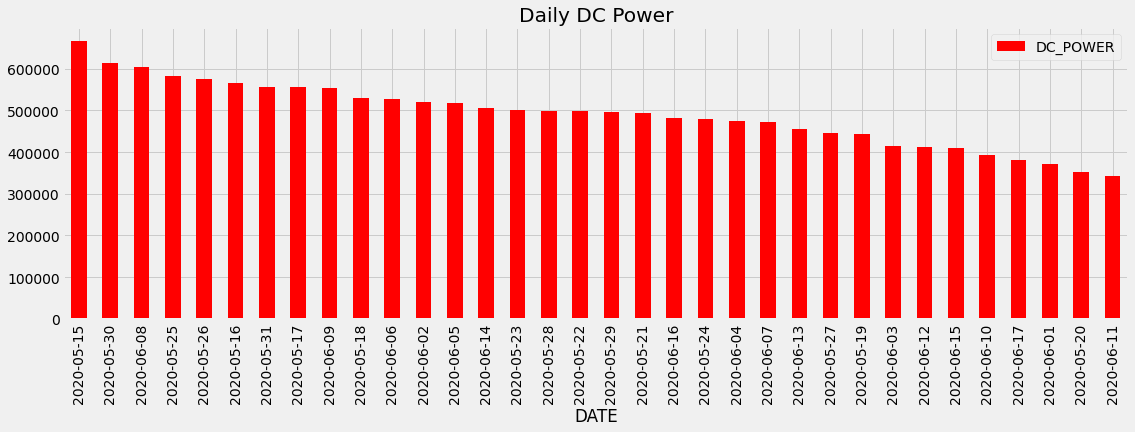

In [18]:
daily_dc = solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

Form the per day DC_POWER generation graph we can find the average power generation per day.

Highest average DC_POWER Generation is on: 2020-05-15

Lowest average DC_POWER Generation is on : 2020-06-11

NOTE: This Large variation in the DC_POWER generation is due to the fault in the system or due to weather change, which needs to study further. But from this bar plot we find the day on which there is highest DC_POWER is generated and the day with the lowest DC_POWER generated.

## Multiple Plotting of IRRADIATION generation on per day basis.

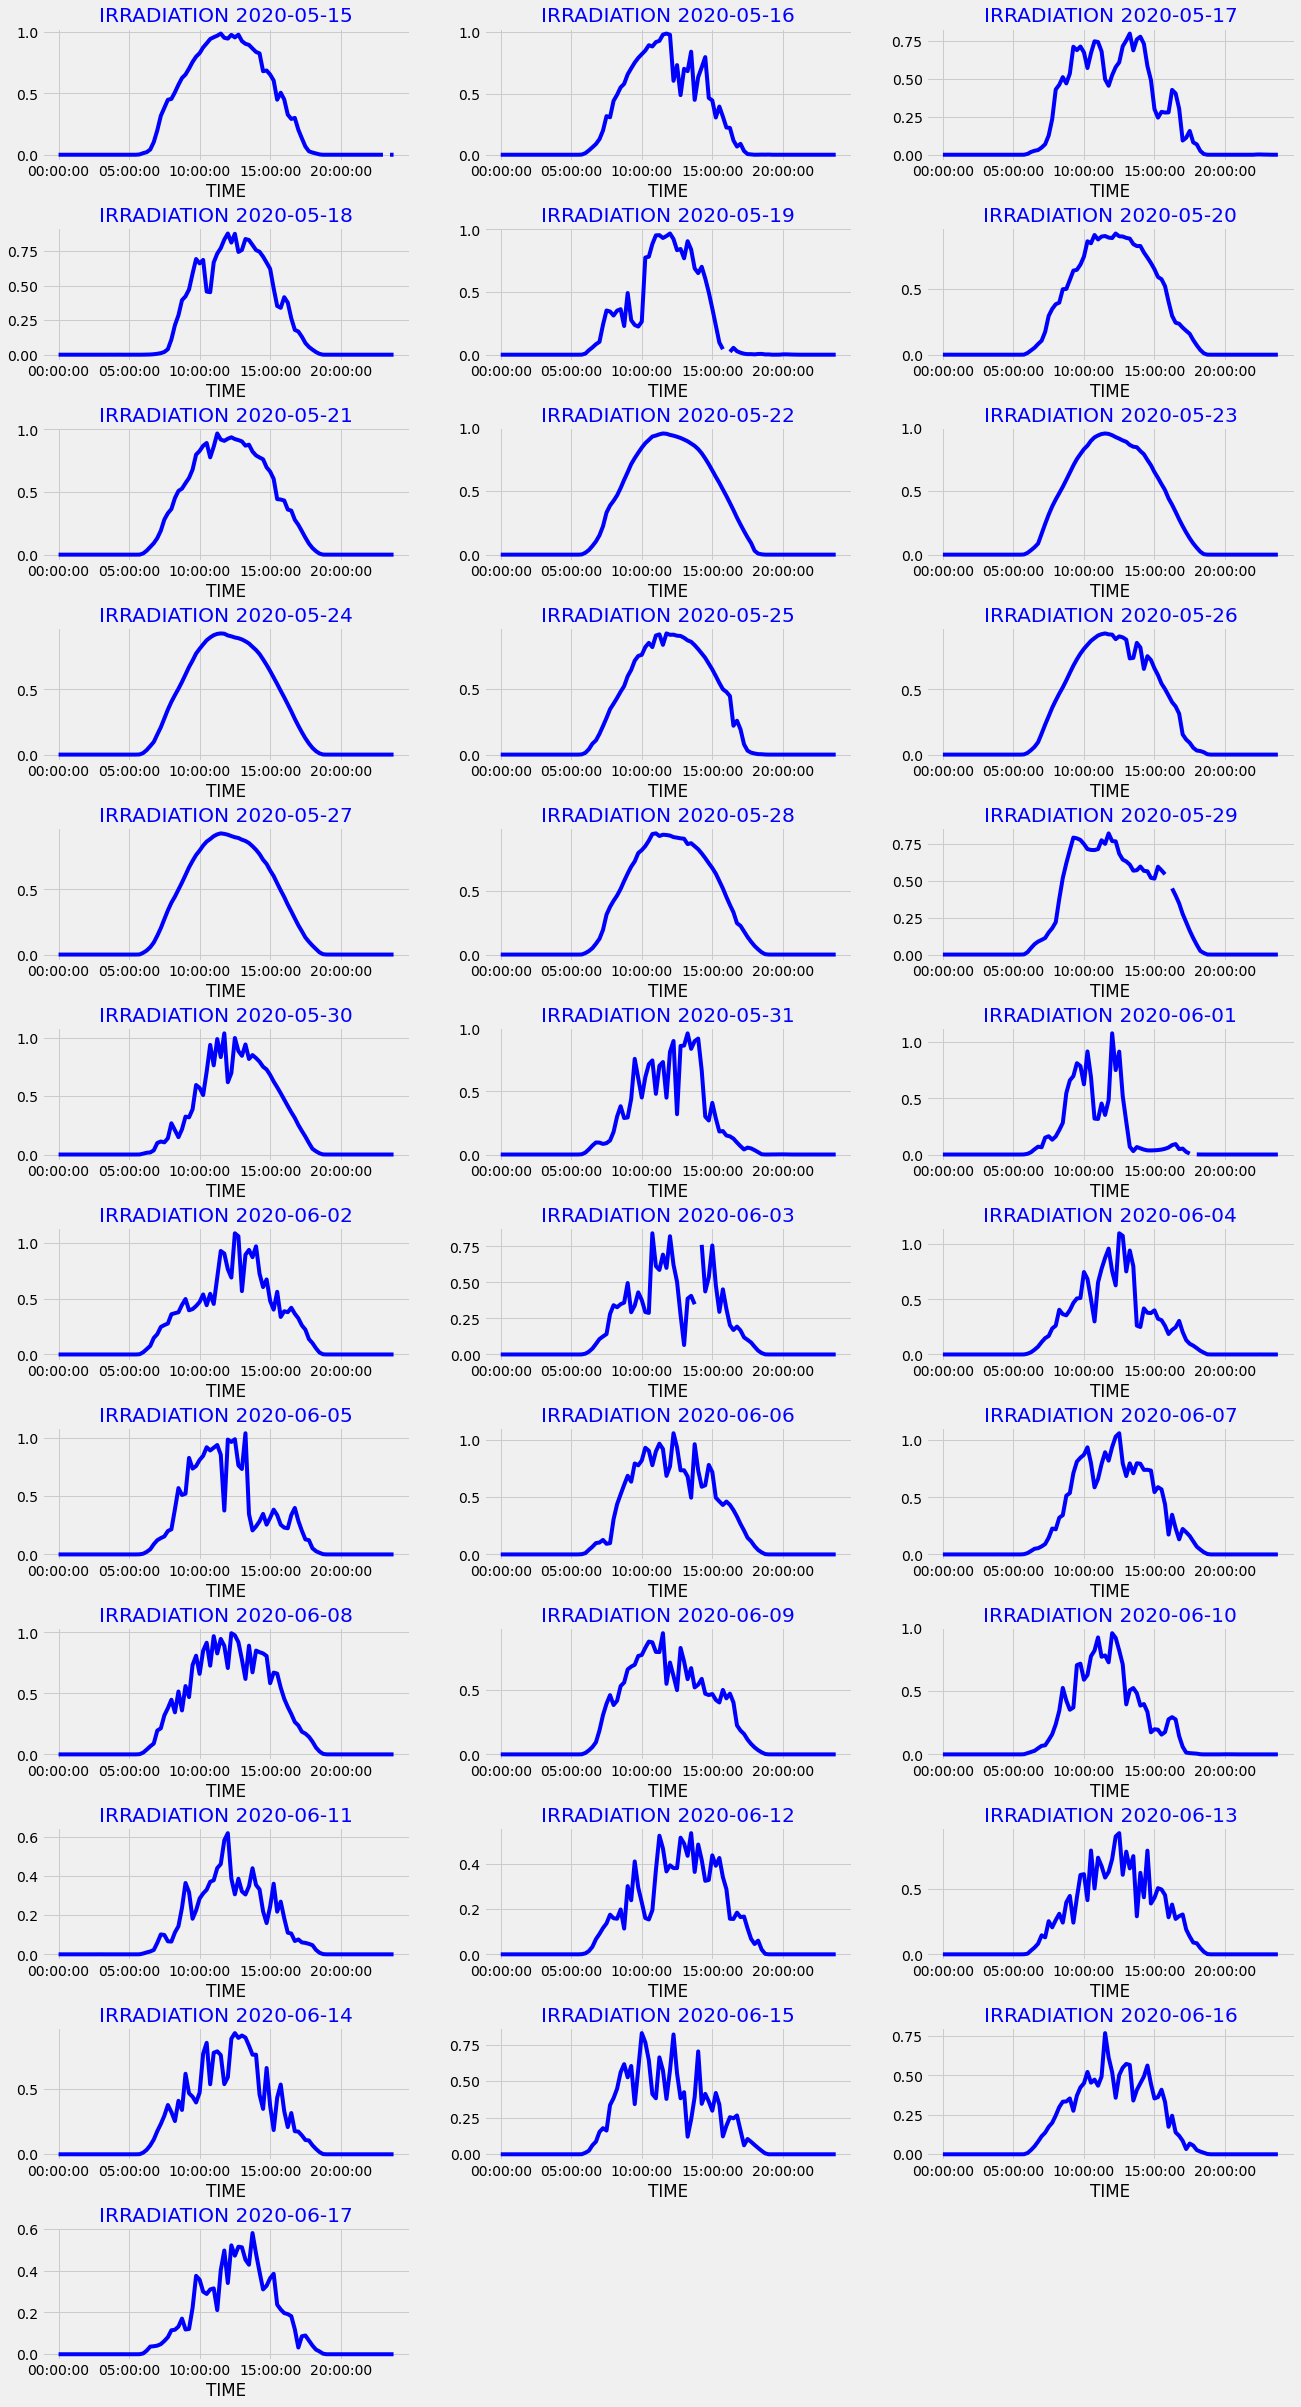

In [19]:
solar_irradiation = solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

IRRADIATION graph pattern is looking very similar to the corresponding DC_POWER generation on per day basis.

In solar power plant DC_POWER or Output power is mostly depends on IRRADIATION .Or it is not wrong to say that it’s directly proportional.

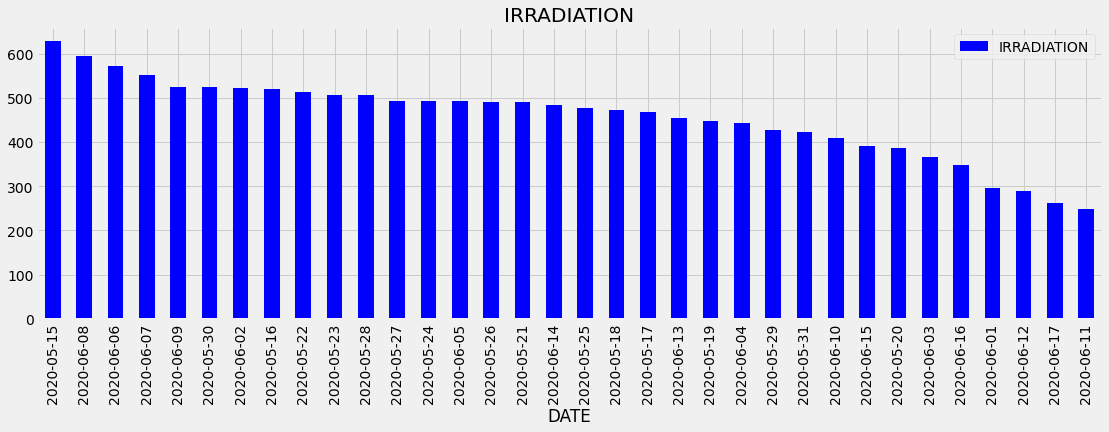

In [20]:
daily_irradiation = solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()


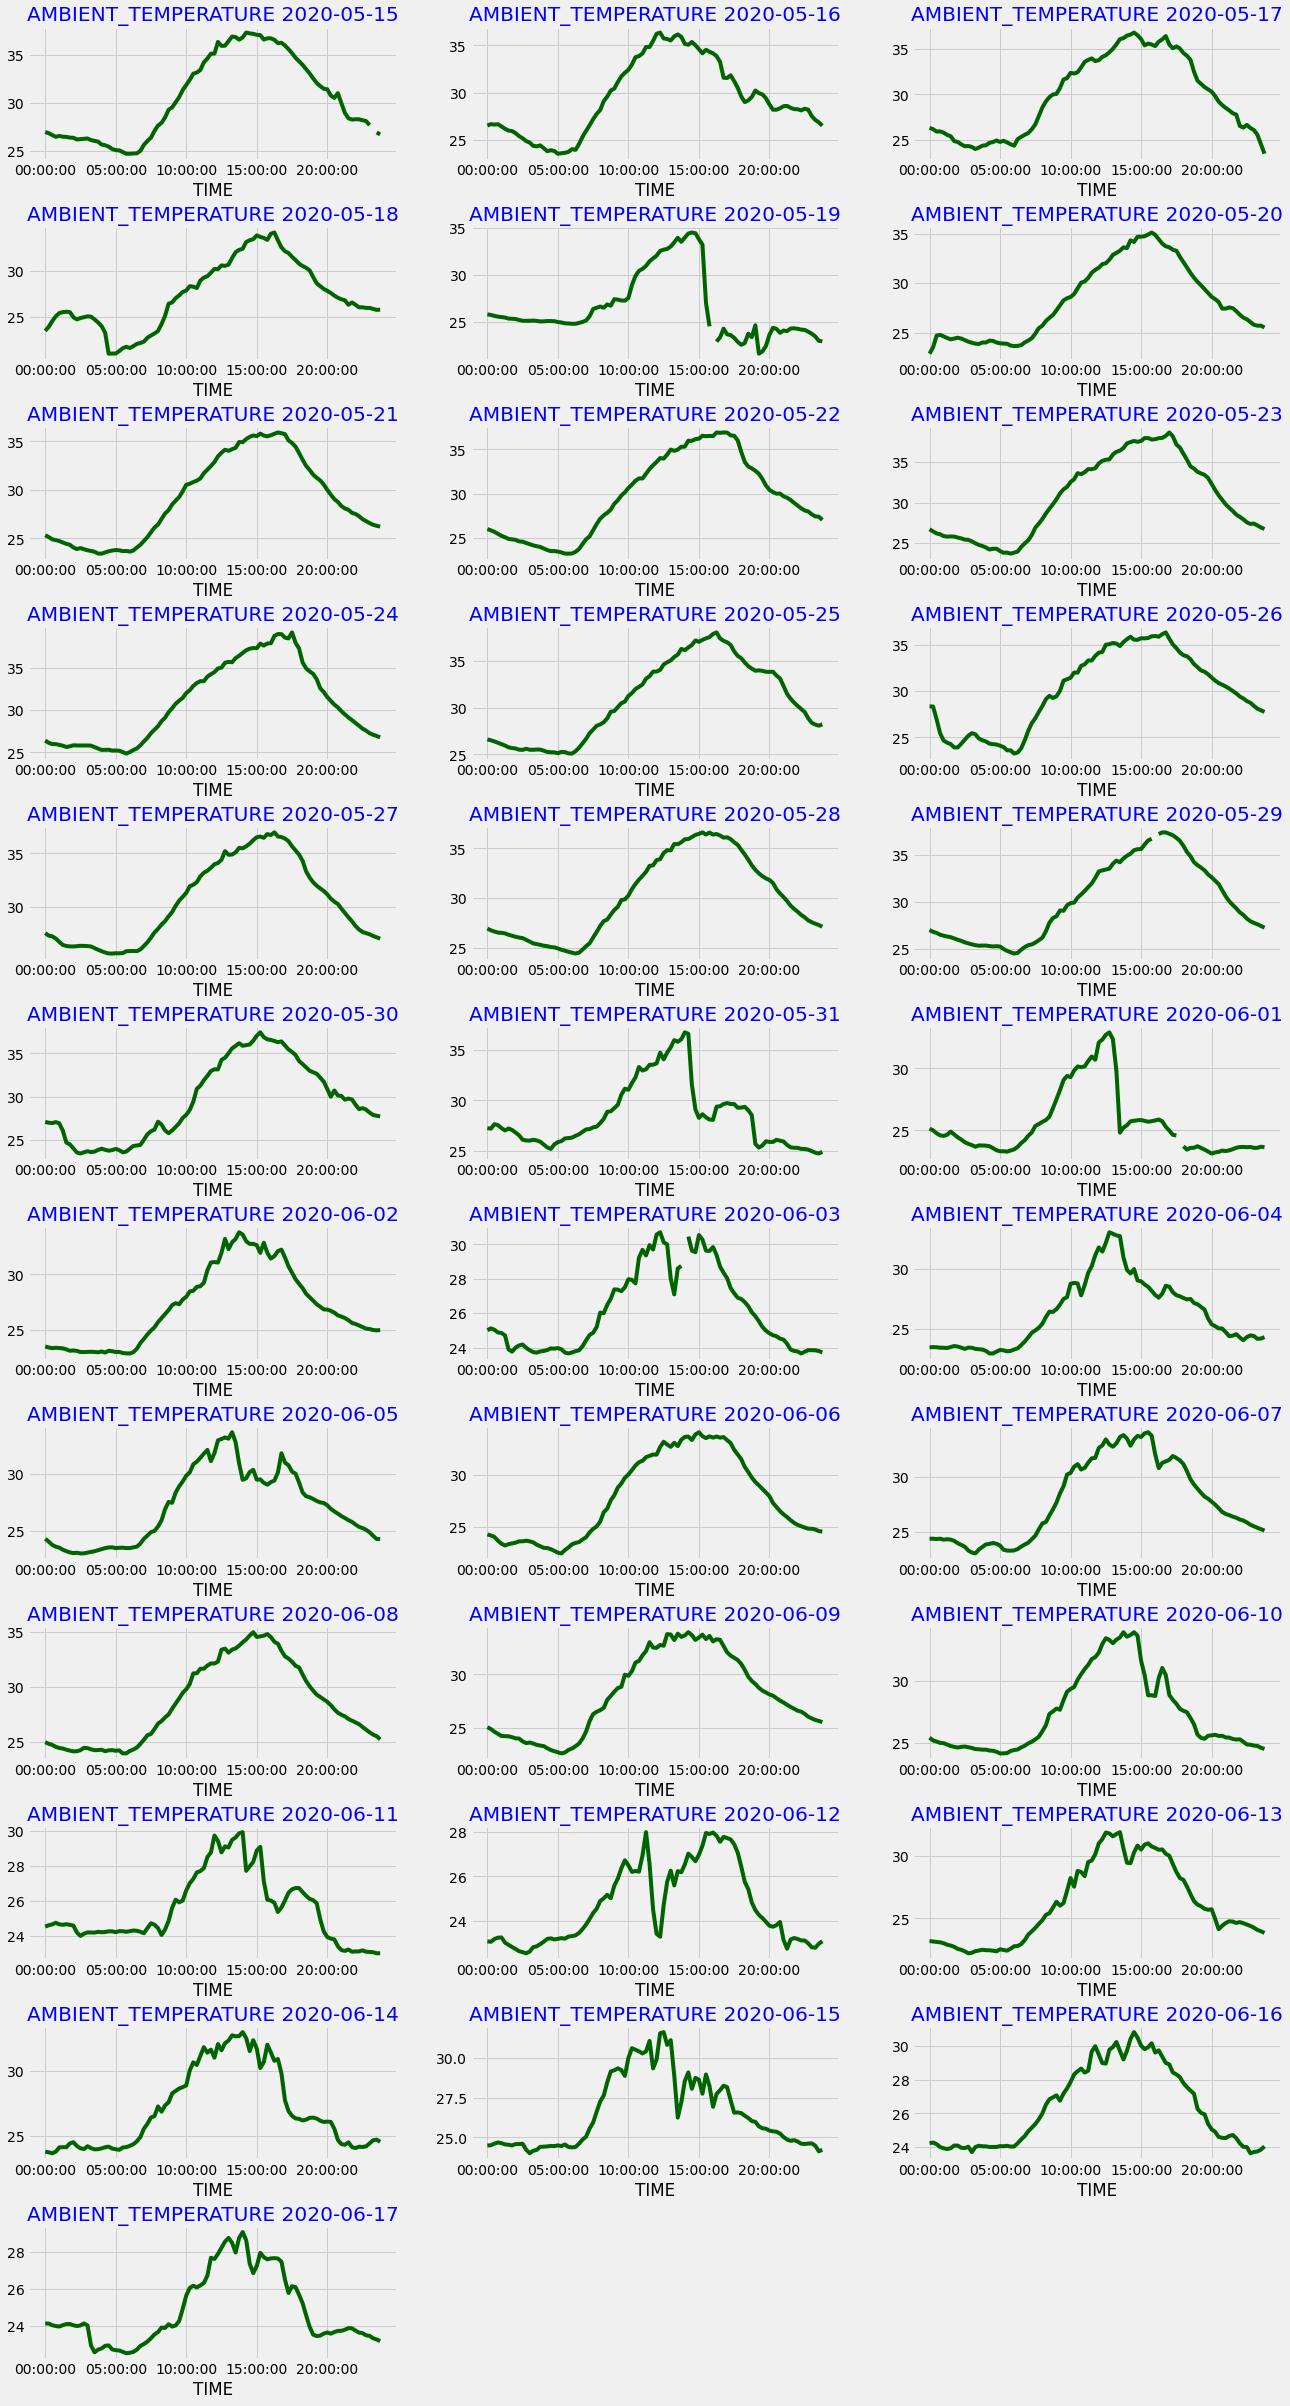

In [21]:
solar_ambiant_temp = solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

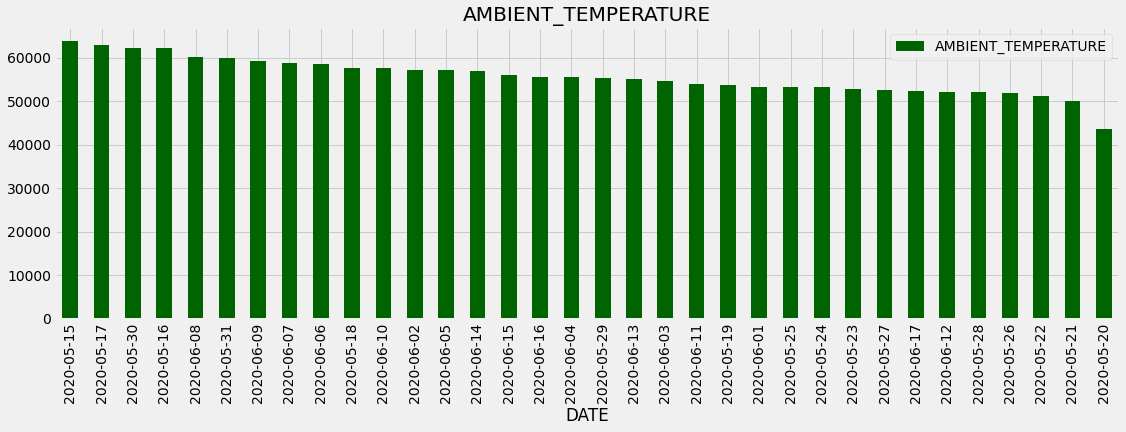

In [22]:
daily_ambient_temp = solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

Best and Worst Power generation comparision:
Major Environmental Factors affecting the of solar power generation are.

1. The thickness of clouds is also a factor in how much sunlight your solar panels can soak up. We may see thicker clouds in winter too and this is something else to look out for. It’s hard for sunlight to travel through thick clouds, which will affect your solar power system’s output.
2. While we’ve looked at the sun’s positioning and how it can affect output, there’s another factor to consider when your system may not be performing at its maximum… even at midday.
3. Solar panel temperature is the number one reason behind your solar power system not achieving peak performance
4. Solar power generation is directly depends on Irradiation comming from the sun.

# Highest average DC_POWER is generated on "2020-05-15"

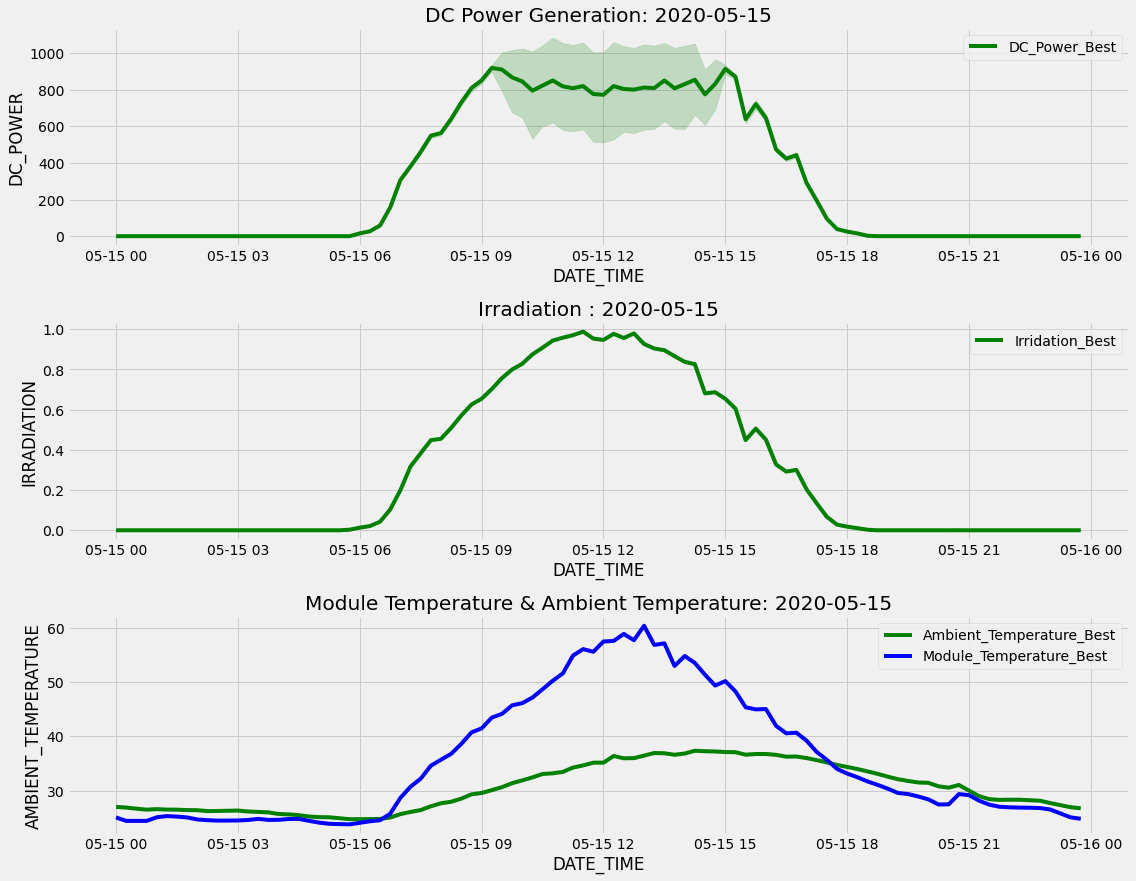

In [23]:
plt.figure(figsize=(16,16))

date=["2020-05-15"]

plt.subplot(411)
sns.lineplot(solar[solar["DATE_STRING"].isin(date)].DATE_TIME, solar[solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best",color='green');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(solar[solar["DATE_STRING"].isin(date)].DATE_TIME, solar[solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best",color='green');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(solar[solar["DATE_STRING"].isin(date)].DATE_TIME, solar[solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best",color='green');
sns.lineplot(solar[solar["DATE_STRING"].isin(date)].DATE_TIME, solar[solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

NOTE: Both DC_POWER graph and IRRADIATION graph is almost looking like an ideal graph which is explained earlier. Weather is also looking good, and there is no cloud is in the sky because there is very less variation in IRRADIATION and temperature of the solar panel and ambient temperature.

 # Lowest average DC_POWER is generated on "2020-06-11"

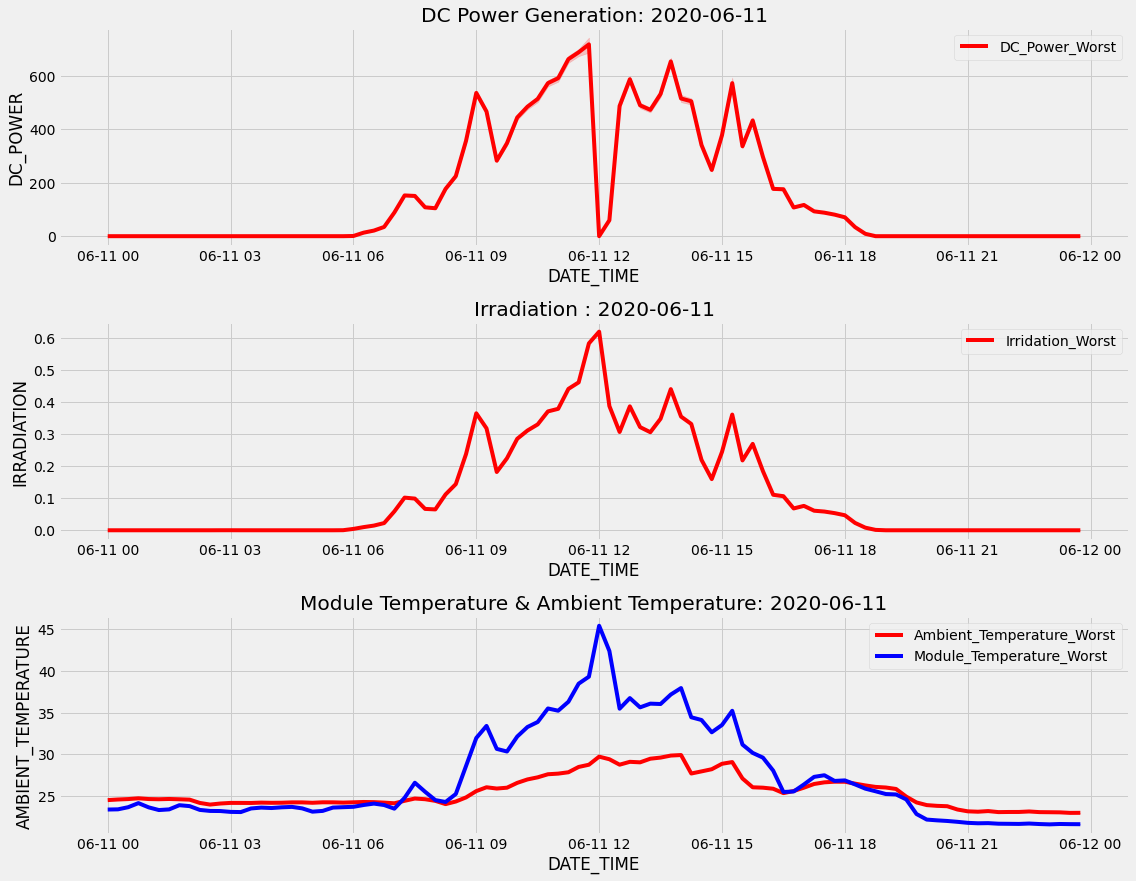

In [25]:
date=["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(solar[solar["DATE_STRING"].isin(date)].DATE_TIME, solar[solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst",color='red');
plt.title("DC Power Generation: {}" .format(date[0]))

plt.subplot(412)
sns.lineplot(solar[solar["DATE_STRING"].isin(date)].DATE_TIME, solar[solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst",color='red');
plt.title("Irradiation : {}" .format(date[0]))

plt.subplot(413)
sns.lineplot(solar[solar["DATE_STRING"].isin(date)].DATE_TIME, solar[solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst",color='red');
sns.lineplot(solar[solar["DATE_STRING"].isin(date)].DATE_TIME, solar[solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst",color='blue');
plt.title("Module Temperature & Ambient Temperature: {}" .format(date[0]));

plt.tight_layout()
plt.show()

NOTE: There are very large fluctuations in both DC_POWER graph and IRRADIATION graph

Possible Reasons for these large fluctuation in the DC_POWER, IRRADIATION, Ambient temperature, Module temperature:

At about 12 O’clock there is a sharp decline in the DC_POWER generation from 700 to almost 20 KWatt.

And at the same time IRRADIATION fall from 0.6 to 0.3 almost half.

Ambient temperature and Module temperature also fall drastically. Module temperature from 45 C to 35 C & Ambient temperature is also reduced.

### The possible reason for this reduction is due to may be heavy rain and heavily clouded sky and bad weather. There is almost very less possibility of any fault in the system 

In [ ]:
# Solar Power Plant Inverter Efficiency Calculation


In [27]:
# Solar Power Plant Inverter Efficiency Calculation

solar_dc_power = solar[solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = solar[solar['AC_POWER'] > 0]['AC_POWER'].values
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [29]:
AC_list=[]
for i in solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [30]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

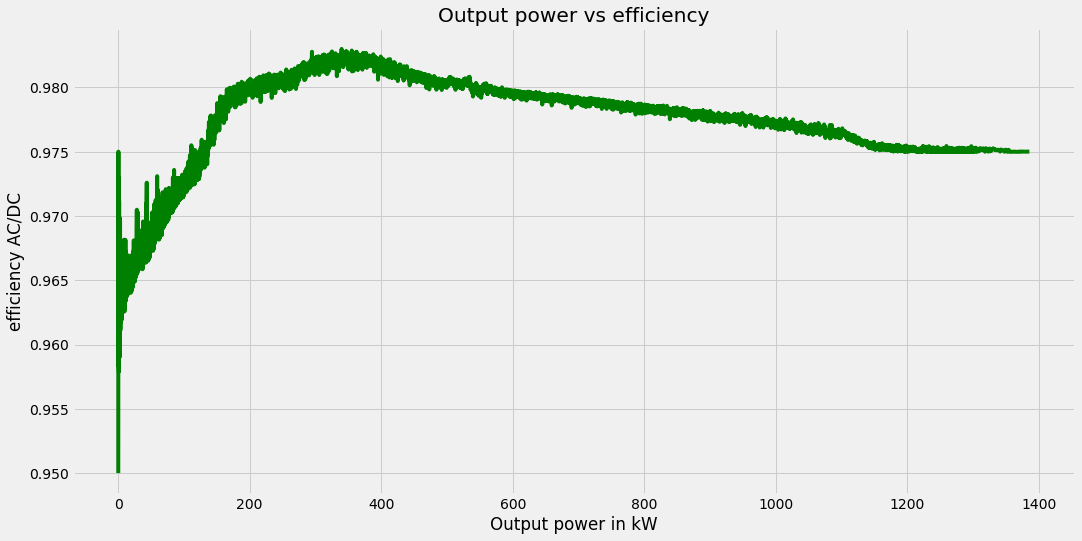

In [31]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

What does inverter efficiency mean?

1. In fact, we shall discuss here the general power inverter efficiency whether it’s solar inverter or pure sine wave inverter or even modified sine wave inverter.

2. The inverter efficiency refers to how much dc power will be converted to ac power, as some of power will be lost during this transition in two forms:

Heat loss.
1. Stand-by power which consumed just to keep the inverter in power mode. Also, we can refer to it as inverter power consumption at no load condition.

2. Hence, inverter efficiency = pac/pdc where pac refers to ac output power in watt and pdc refers to dc input power in watts.


For the two basic inverters types in the market, the typical efficiency of high-quality pure sine wave inverter varied from 90% to 95% and for low quality modified sine wave inverter, it varied from 75% to 85%.

This power inverter efficiency value depends on inverter load power capacity variation, as the efficiency increases and may reach to its max value at higher load power capacity in compare to lower loading power capacity, and in condition that not going above inverter output power capacity limit. Generally, below 15% inverter loading, the efficiency will be quite low. Consequently, good matching between inverter capacity and its load capacity will enable us harvest larger efficiency, which means larger inverter ac output power for the same dc input power.


# Solar Power Prediction

In [33]:
df2 = solar.copy()
x = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

x.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000000,2.429011e+06,27.004764,25.060789,0.0,0.0
1,0.000000,1.215279e+09,27.004764,25.060789,0.0,0.0
2,3075.333333,2.247720e+09,27.004764,25.060789,0.0,0.0
3,269.933333,1.704250e+06,27.004764,25.060789,0.0,0.0
4,3177.000000,1.994153e+07,27.004764,25.060789,0.0,0.0


In [39]:
x.shape

(67698, 6)

In [49]:
x_train=x[:60000]
x_test=x[60000:]
y_train=y[:60000]
y_test=y[60000:]

In [50]:
x_train.shape

(60000, 6)

In [51]:
y_train.shape

(60000,)

In [52]:
x_test.shape

(7698, 6)

In [53]:
y_test.shape

(7698,)

In [54]:
#  LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=21)

lgr_clf = LinearRegression()
lgr_clf.fit(x_train,y_train)
score = 100*lgr_clf.score(x_test,y_test)
print(f'LR Model score = {score:4.4f}%')



LR Model score = 99.9988%


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lgr = LinearRegression()
lgr.fit(x_train,y_train)
y_pred_lgr = lgr.predict(x_test)
R2_Score = round(r2_score(y_pred_lgr,y_test) * 100, 2)

print("R2 Score : ",R2_Score,"%")

R2 Score :  100.0 %


In [57]:
## RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred_rfr = lgr.predict(x_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


In [59]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dct = DecisionTreeRegressor()
dct.fit(x_train,y_train)

y_pred_dct = lgr.predict(x_test)
R2_Score_dct = round(r2_score(y_pred_dct,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dct,"%")

R2 Score :  100.0 %


#  Result Prediction

In [60]:
prediction = rfr.predict(x_test)
print(prediction)

[552.8252381  433.79165238 511.88591429 ...   0.           0.
   0.        ]


In [61]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
60000,568.764286,552.825238
60001,442.600000,433.791652
60002,525.235714,511.885914
60003,546.942857,533.941814
60004,566.585714,551.505548


In [62]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
60000,568.764286,552.825238,15.939048
60001,442.600000,433.791652,8.808348
60002,525.235714,511.885914,13.349800
60003,546.942857,533.941814,13.001043
60004,566.585714,551.505548,15.080167


In [63]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
67629,0.000000,0.000000,0.000000
60937,0.000000,0.000000,0.000000
64337,591.186667,591.101100,0.085567
66654,560.220000,559.548795,0.671205
60376,1145.233333,1144.614886,0.618448
60916,0.000000,0.000000,0.000000
62922,158.046667,157.882481,0.164186
62580,702.960000,702.867090,0.092910
60822,147.640000,147.746319,-0.106319
66293,165.780000,165.706886,0.073114
